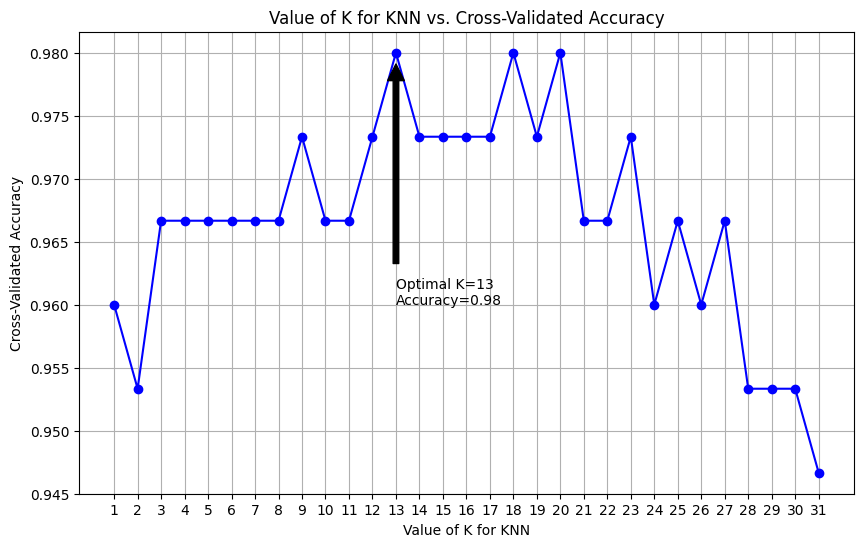

The optimal k value is 13 with mean accuracy 0.98
Best k: 13
Best accuracy: 0.98


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define a range of values for "k"
k_range = range(1, 32)  # 1 to 31 (inclusive)

# Initialize lists to store mean accuracy scores and optimal k
mean_scores = []
optimal_k = None
optimal_accuracy = 0.0

# Iterate over each value of "k"
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation and store the mean accuracy score
    scores = cross_val_score(knn, X, y, cv=10)
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

    # Check if the current "k" has a higher accuracy and update optimal_k and optimal_accuracy
    if mean_score > optimal_accuracy:
        optimal_k = k
        optimal_accuracy = mean_score

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o', linestyle='-', color='b')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.annotate(f'Optimal K={optimal_k}\nAccuracy={optimal_accuracy:.2f}',
             xy=(optimal_k, optimal_accuracy),
             xytext=(optimal_k, optimal_accuracy - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print(f"The optimal k value is {optimal_k} with mean accuracy {optimal_accuracy:.2f}")
from sklearn.model_selection import GridSearchCV

# Define a range of values for "k" for GridSearchCV
param_grid = {'n_neighbors': k_range}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the model on the entire dataset
grid_search.fit(X, y)

# Get the best parameter value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy:.2f}")

